In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [126]:
df = pd.read_csv(
    'bhp.csv'
    )

In [127]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [128]:
df.shape

(13200, 7)

In [129]:
max_, min_ = df.price_per_sqft.quantile([0.001, 0.999])

In [130]:
outliers = df[(df.price_per_sqft>min_) | (df.price_per_sqft<max_)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
1005,other,1 BHK,15.0,1.0,30.0,1,200000
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
7575,other,1 BHK,425.0,1.0,750.0,1,176470
5343,other,9 BHK,42000.0,8.0,175.0,9,416
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371


In [131]:
df2 = df[(df.price_per_sqft>max_) & (df.price_per_sqft<min_)]

In [132]:
df2.shape

(13172, 7)

In [133]:
min_limit = df2.price_per_sqft.mean()-4*df2.price_per_sqft.std()
max_limit = df2.price_per_sqft.mean()+4*df2.price_per_sqft.std()
print(min_limit, max_limit)

-9900.429065502582 23227.73653589432


In [134]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6744,HAL 2nd Stage,2 Bedroom,600.0,3.0,145.0,2,24166
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166
3401,Indira Nagar,6 Bedroom,2480.0,4.0,750.0,6,30241
9290,other,4 Bedroom,2400.0,3.0,750.0,4,31250
8454,other,3 Bedroom,7800.0,3.0,2000.0,3,25641
5315,Banashankari Stage II,4 Bedroom,1500.0,2.0,650.0,4,43333
3420,other,3 Bedroom,1350.0,3.0,380.0,3,28148
9360,HAL 2nd Stage,4 Bedroom,2280.0,4.0,615.0,4,26973
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
4357,other,4 Bedroom,3250.0,5.0,850.0,4,26153


In [135]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

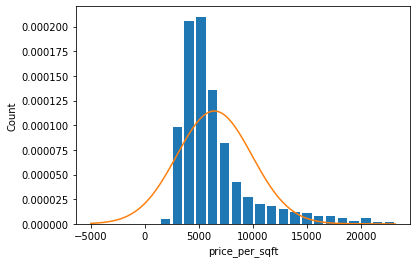

In [136]:
plt.hist(df3['price_per_sqft'], bins=20, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [137]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-137-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
2334,Uttarahalli,3 BHK,1345.0,2.0,57.0,3,4237,-0.586004
2769,9th Phase JP Nagar,2 BHK,1005.0,2.0,42.0,2,4179,-0.600010
859,Kodigehaali,3 BHK,1320.0,3.0,65.0,3,4924,-0.420103
1078,other,4 Bedroom,2400.0,5.0,775.0,4,32291,6.188654
12922,Whitefield,2 BHK,1270.0,2.0,52.0,2,4094,-0.620536
3636,Ramamurthy Nagar,2 BHK,1185.0,2.0,45.5,2,3839,-0.682115
6442,Sarjapur Road,3 BHK,1660.0,2.0,116.0,3,6987,0.078084
592,Kalena Agrahara,3 BHK,1450.0,2.0,85.0,3,5862,-0.193588
4616,Hebbal,3 BHK,1645.0,3.0,120.0,3,7294,0.152220
6641,other,3 BHK,1600.0,3.0,95.0,3,5937,-0.175477


In [138]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [139]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3488,Banashankari Stage III,8 Bedroom,1200.00,7.0,350.0,8,29166,5.434010
3136,other,4 Bedroom,1200.00,4.0,350.0,4,29166,5.434010
5974,other,4 Bedroom,2360.00,4.0,650.0,4,27542,5.041836
5639,other,3 BHK,2777.29,5.0,650.0,3,23404,4.042565
12631,Rajaji Nagar,5 Bedroom,2500.00,4.0,650.0,5,26000,4.669464


In [140]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [141]:
df2.shape[0] - df4.shape[0]

125